In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = "https://www.lenskart.com/sunglasses.html?pageCount=77"

In [4]:
response = requests.get(url)
response.status_code

200

In [5]:
soup = BeautifulSoup(response.text)

# Sun Glasses

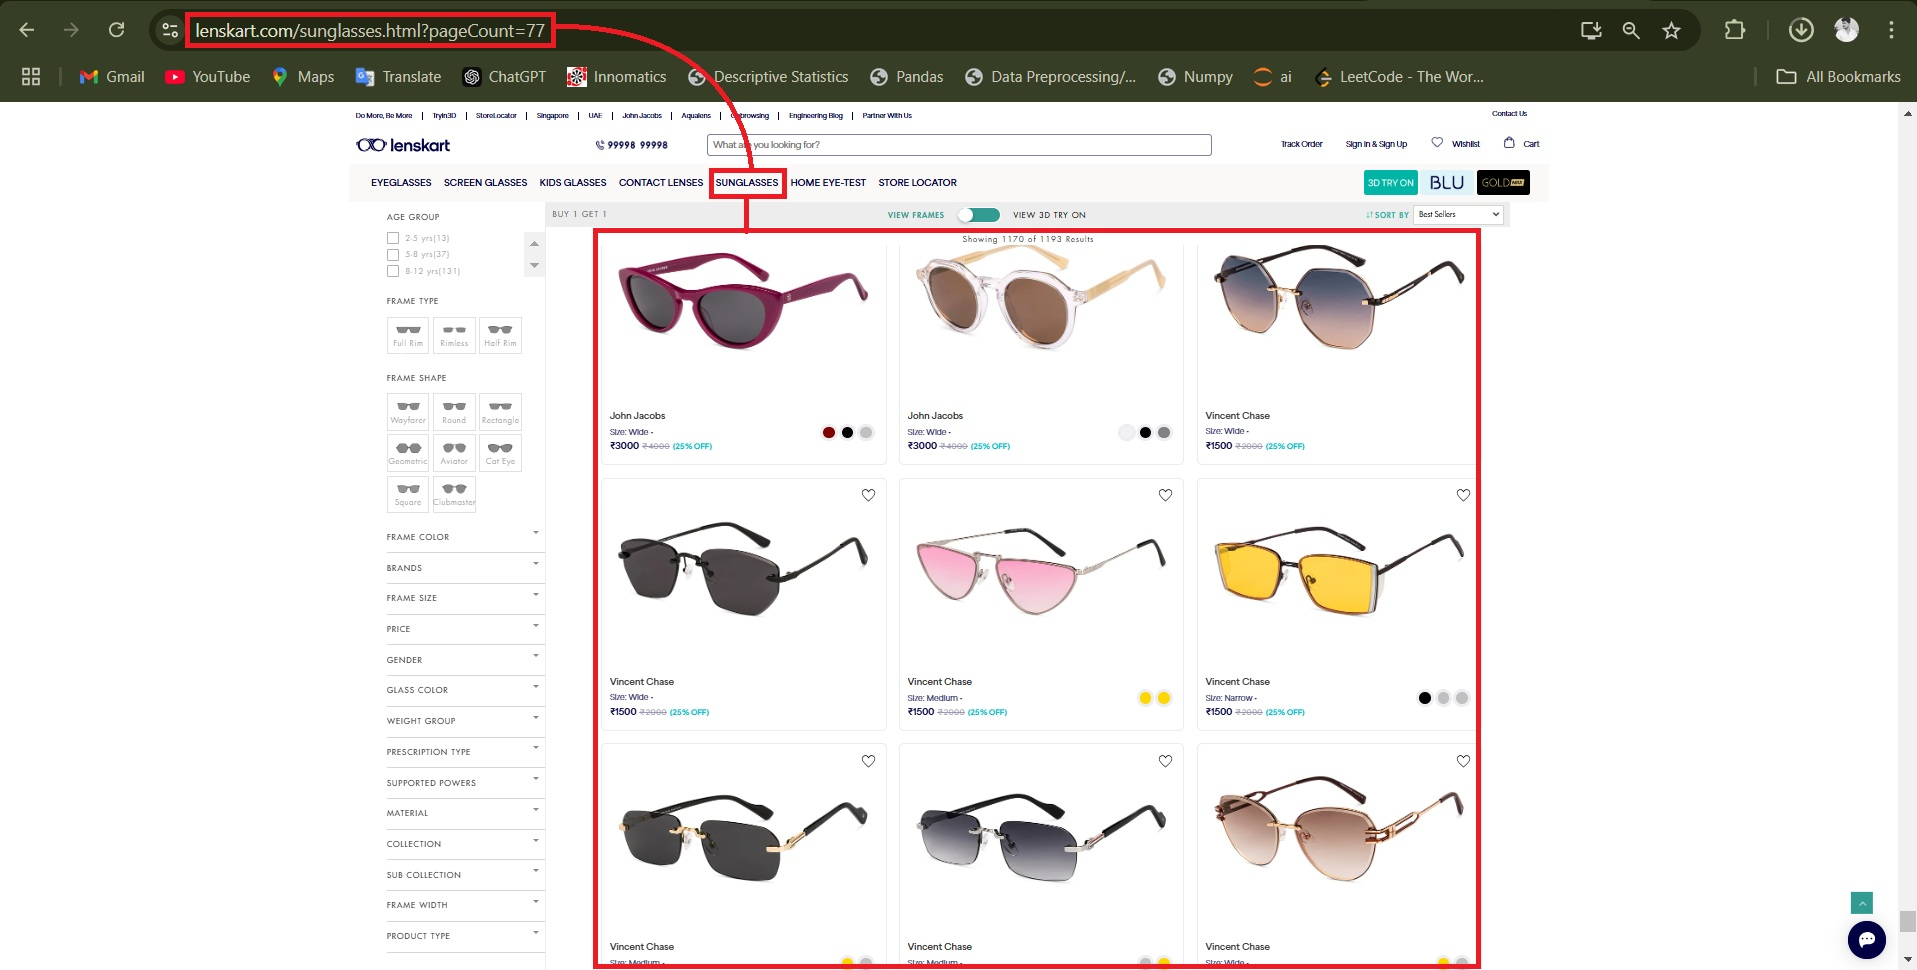

In [8]:
soup.find_all("p",class_ = "ProductTitle--xakon1 jysllL")

[<p class="ProductTitle--xakon1 jysllL">Vincent Chase</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">John Jacobs</p>,
 <p class="ProductTitle--xakon1 jysllL">John Jacobs</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">John Jacobs</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="ProductTitle--xakon1 jysllL">Vincent Chase Polarized</p>,
 <p class="

In [9]:
Brand = []
for i in soup.find_all("p",class_ = "ProductTitle--xakon1 jysllL"):
    Brand.append(i.text)

In [10]:
len(Brand)

1170

In [11]:
size = []
for i in soup.find_all("span", class_="ProductSize--1gq7vf9 ksOSAx"):
    match = re.findall(r'Size:\s*(.*?)\s*•',i.get_text())
    size.append(match[0])

In [12]:
len(size)

1170

In [13]:
OG_price = []
for i in soup.find_all("span",class_ = "Strikethrough--19jxslx bxaPOA"):
    OG_price.append(i.text)

In [14]:
len(OG_price)

1164

In [15]:
OF_price = []
for i in soup.find_all("div",class_ = "OfferPrice--169iodc kPAsSR"):
    OF_price.append(i.text)

In [16]:
len(OF_price)

1164

In [17]:
offer = []
for i in soup.find_all("h5",class_="Title--19p6sp5 dnrDXb"):
    match = re.findall('\d+%',i.get_text())
    offer.append(match[0])

In [18]:
len(offer)

1164

In [19]:
rating = []
for i in soup.find_all("span",class_ = "NumberedRatingSpan--kts3v6 cSQYCU"):
    rating.append(i.text)

In [20]:
len(rating)

1170

In [21]:
dic = {"Brand":Brand,"Size":size,"Rating":rating}

In [22]:
df = pd.DataFrame(dic)

In [23]:
df

,Brand,Size,Rating
0,Vincent Chase,Medium,4.8
1,Vincent Chase Polarized,Medium,4.9
2,Vincent Chase Polarized,Wide,4.8
3,Vincent Chase Polarized,Medium,5
4,Vincent Chase Polarized,Medium,4.9
...,...,...,...
1165,OJOS,Extra Wide,0
1166,OJOS,Wide,0
1167,OJOS,Extra Wide,3.7
1168,OJOS,Wide,0


In [24]:
data = {"Original price":OG_price,"Offer price":OF_price,"Offer":offer}

In [25]:
price = pd.DataFrame(data)

In [26]:
price

,Original price,Offer price,Offer
0,₹ 2000,₹1500,25%
1,₹ 2000,₹1500,25%
2,₹ 2000,₹1500,25%
3,₹ 2000,₹1500,25%
4,₹ 2000,₹1500,25%
...,...,...,...
1159,₹ 2000,₹1500,25%
1160,₹ 2000,₹1500,25%
1161,₹ 2000,₹1500,25%
1162,₹ 2000,₹1500,25%


In [27]:
sun_glasses = pd.concat([df,price],axis=1)

In [28]:
SunGlasses = sun_glasses.dropna()

In [29]:
SunGlasses.to_csv("Sun Glasses.csv")

# Eye Glasses

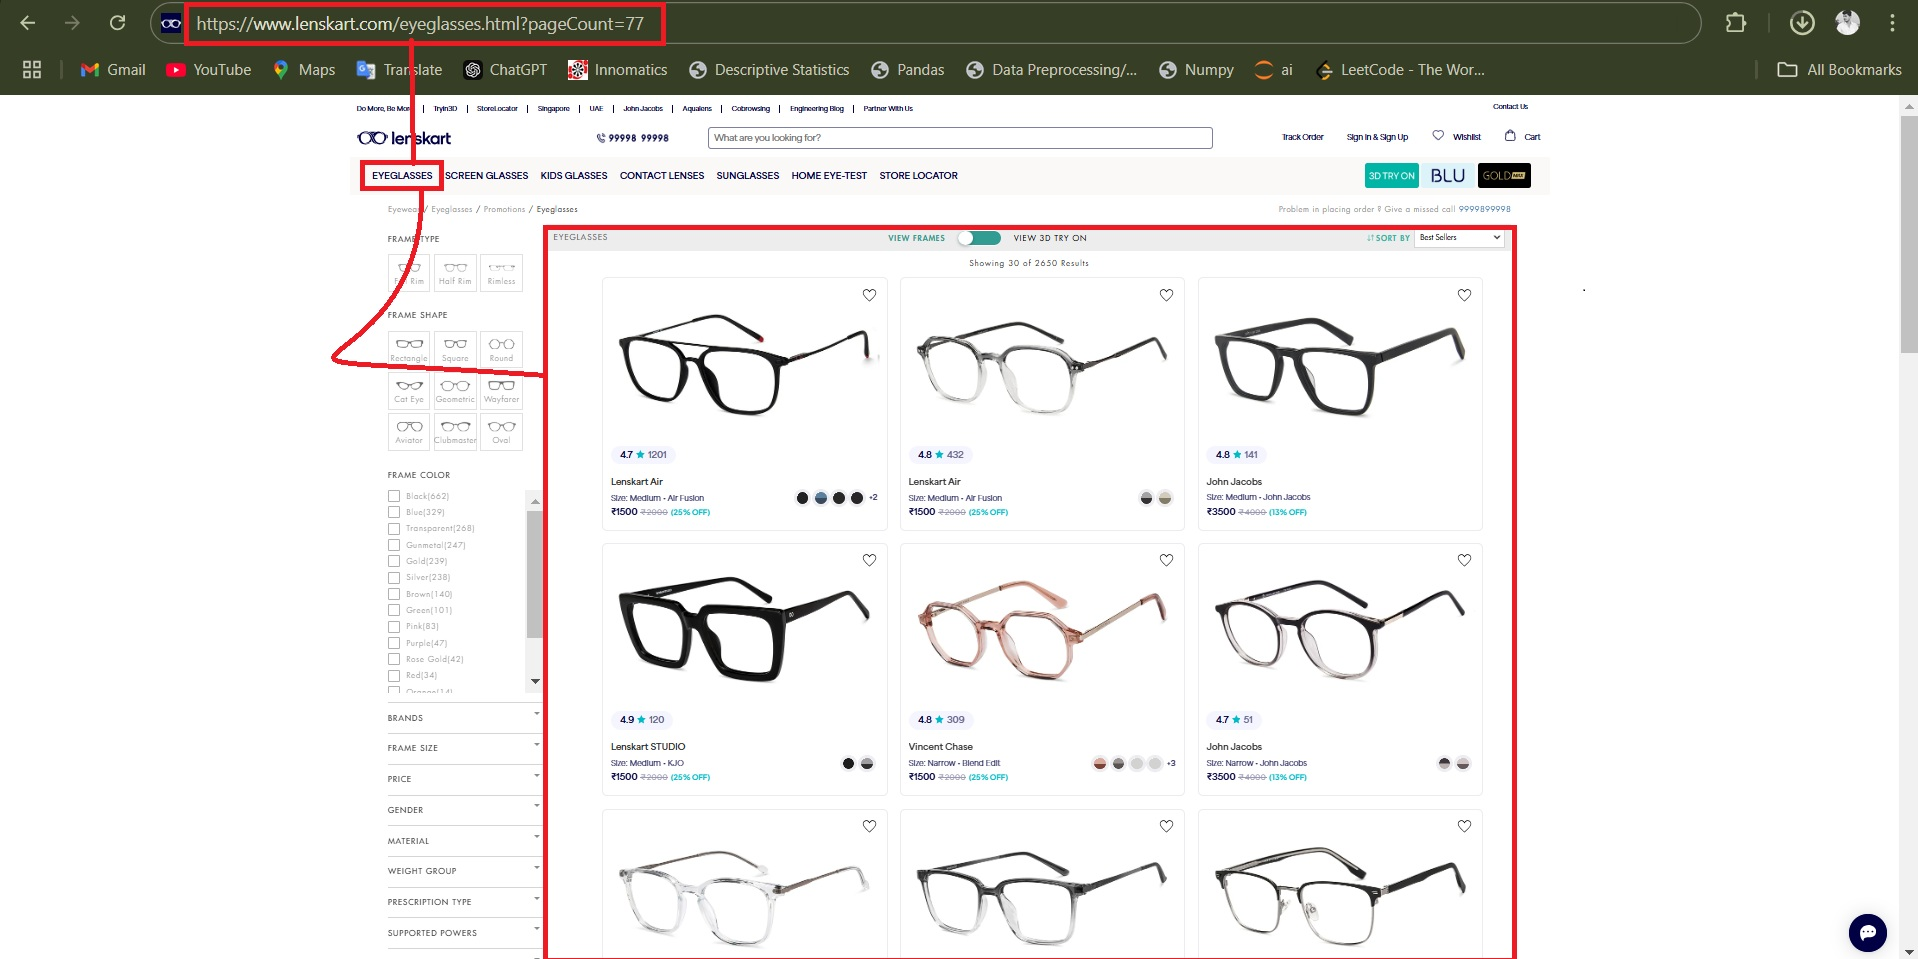

In [32]:
link = "https://www.lenskart.com/eyeglasses.html?pageCount=77"

In [33]:
response = requests.get(link)
response.status_code

200

In [34]:
soup = BeautifulSoup(response.text)

In [35]:
brand = []
for i in soup.find_all("p",class_ = "ProductTitle--xakon1 jysllL"):
    brand.append(i.text)
    

In [36]:
len(brand)

1170

In [37]:
size = []
for i in soup.find_all("span", class_="ProductSize--1gq7vf9 ksOSAx"):
    match = re.findall(r'Size:\s*(.*?)\s*•',i.get_text())
    size.append(match[0])

In [38]:
len(size)

1170

In [39]:
OG_price = []
for i in soup.find_all("span",class_ = "Strikethrough--19jxslx bxaPOA"):
    OG_price.append(i.text)

In [40]:
len(OG_price)

1159

In [41]:
OF_price = []
for i in soup.find_all("div",class_ = "OfferPrice--169iodc kPAsSR"):
    OF_price.append(i.text)

In [42]:
len(OF_price)

1159

In [43]:
offer = []
for i in soup.find_all("h5",class_="Title--19p6sp5 dnrDXb"):
    match = re.findall('\d+%',i.get_text())
    offer.append(match[0])

In [44]:
len(offer)

1159

In [45]:
rating = []
for i in soup.find_all("span",class_ = "NumberedRatingSpan--kts3v6 cSQYCU"):
    rating.append(i.text)

In [46]:
len(rating)

1170

In [47]:
dic1 = {"Brand":brand,"Size":size,"Rating":rating}

In [48]:
df1 = pd.DataFrame(dic1)

In [49]:
data = {"Original price":OG_price,"Offer price":OF_price,"Discount":offer}

In [50]:
df2 = pd.DataFrame(data)

In [51]:
Eye_Glasses = pd.concat([df1,df2],axis=1)

In [52]:
Eye_Glasses.to_csv("Eye Glasses.csv")

# Screen Glasses

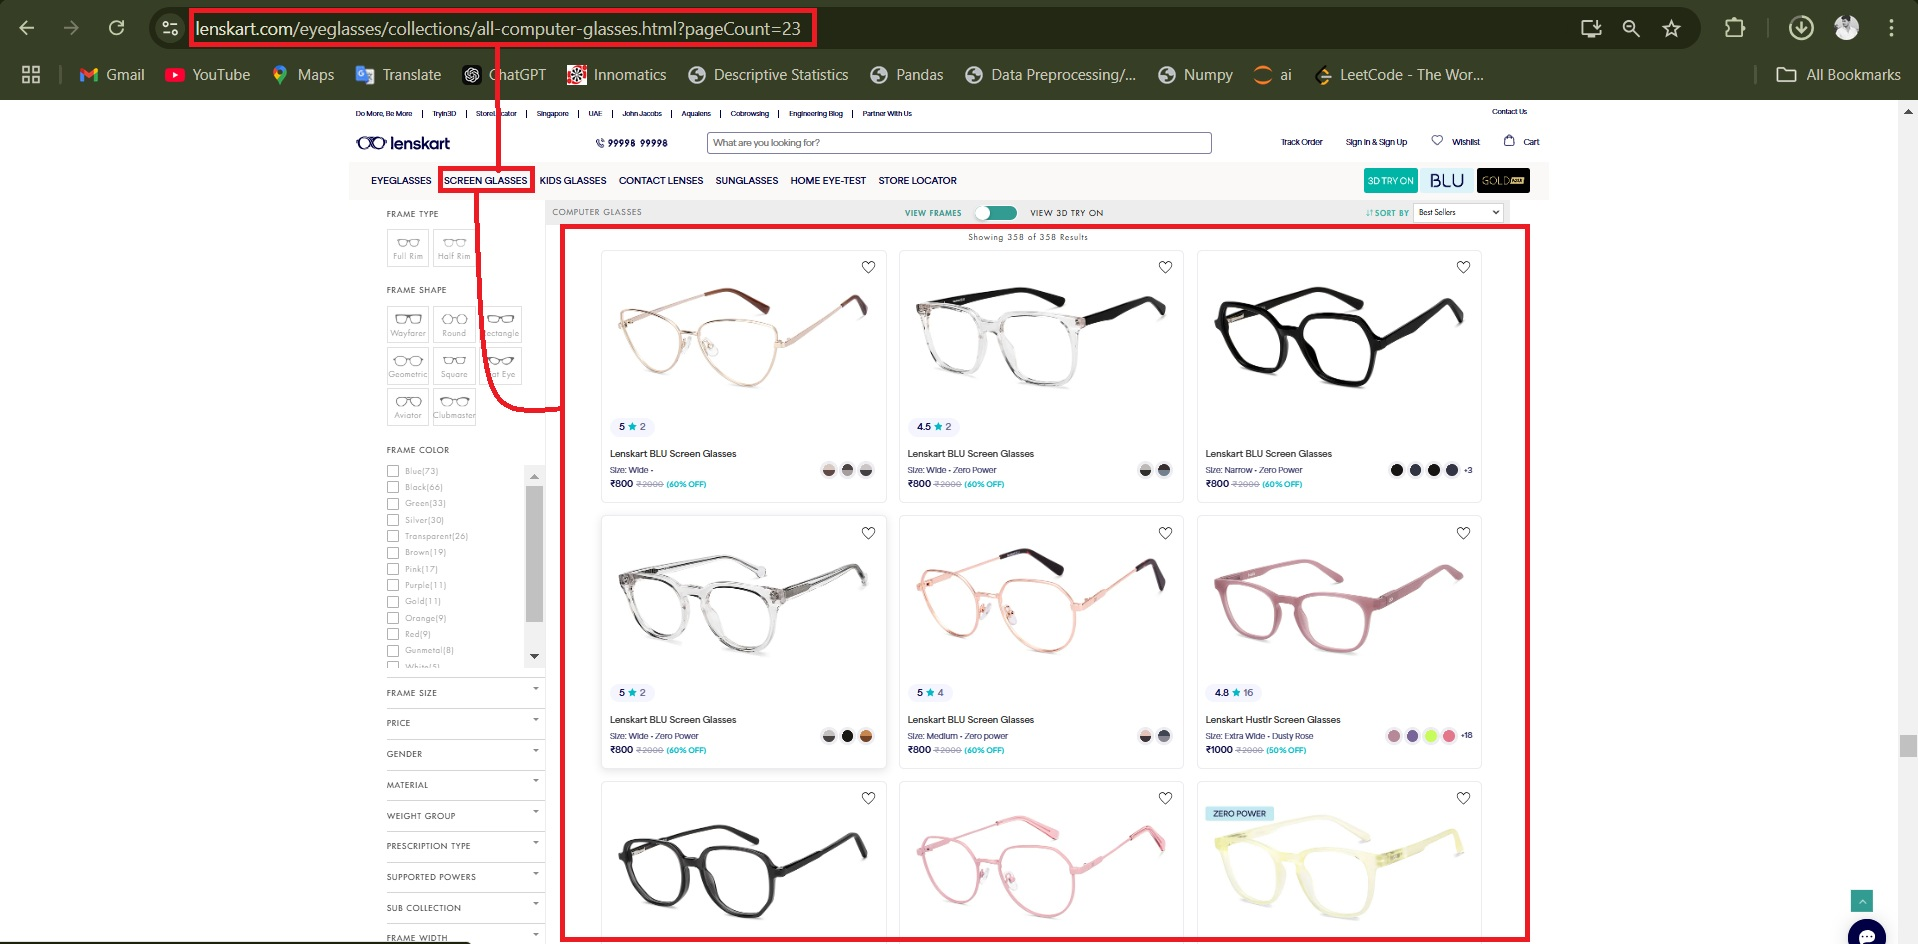

In [55]:
link = "https://www.lenskart.com/eyeglasses/collections/all-computer-glasses.html?pageCount=77"

In [56]:
response = requests.get(link)
response.status_code

200

In [57]:
soup = BeautifulSoup(response.text)

In [58]:
brand = []
for i in soup.find_all("p",class_ = "ProductTitle--xakon1 jysllL"):
    brand.append(i.text)

In [59]:
len(brand)

363

In [60]:
size = []
for i in soup.find_all("span", class_="ProductSize--1gq7vf9 ksOSAx"):
    match = re.findall(r'Size:\s*(.*?)\s*•',i.get_text())
    size.append(match[0])

In [61]:
OG_price = []
for i in soup.find_all("span",class_ = "Strikethrough--19jxslx bxaPOA"):
    OG_price.append(i.text)

In [62]:
OF_price = []
for i in soup.find_all("div",class_ = "OfferPrice--169iodc kPAsSR"):
    OF_price.append(i.text)

In [63]:
offer = []
for i in soup.find_all("h5",class_="Title--19p6sp5 dnrDXb"):
    match = re.findall('\d+%',i.get_text())
    offer.append(match[0])

In [64]:
rating = []
for i in soup.find_all("span",class_ = "NumberedRatingSpan--kts3v6 cSQYCU"):
    rating.append(i.text)

In [65]:
dic2 = {"Brand":brand,"Size":size,"Rating":rating}
data = {"Original price":OG_price,"Offer price":OF_price,"Discount":offer}

In [66]:
df1 = pd.DataFrame(dic2)
df2 = pd.DataFrame(data)

In [67]:
Screen_Glasses = pd.concat([df1,df2],axis = 1)

In [68]:
Screen_Glasses.to_csv("Screen Glasses.csv")

# Power SunGlasses

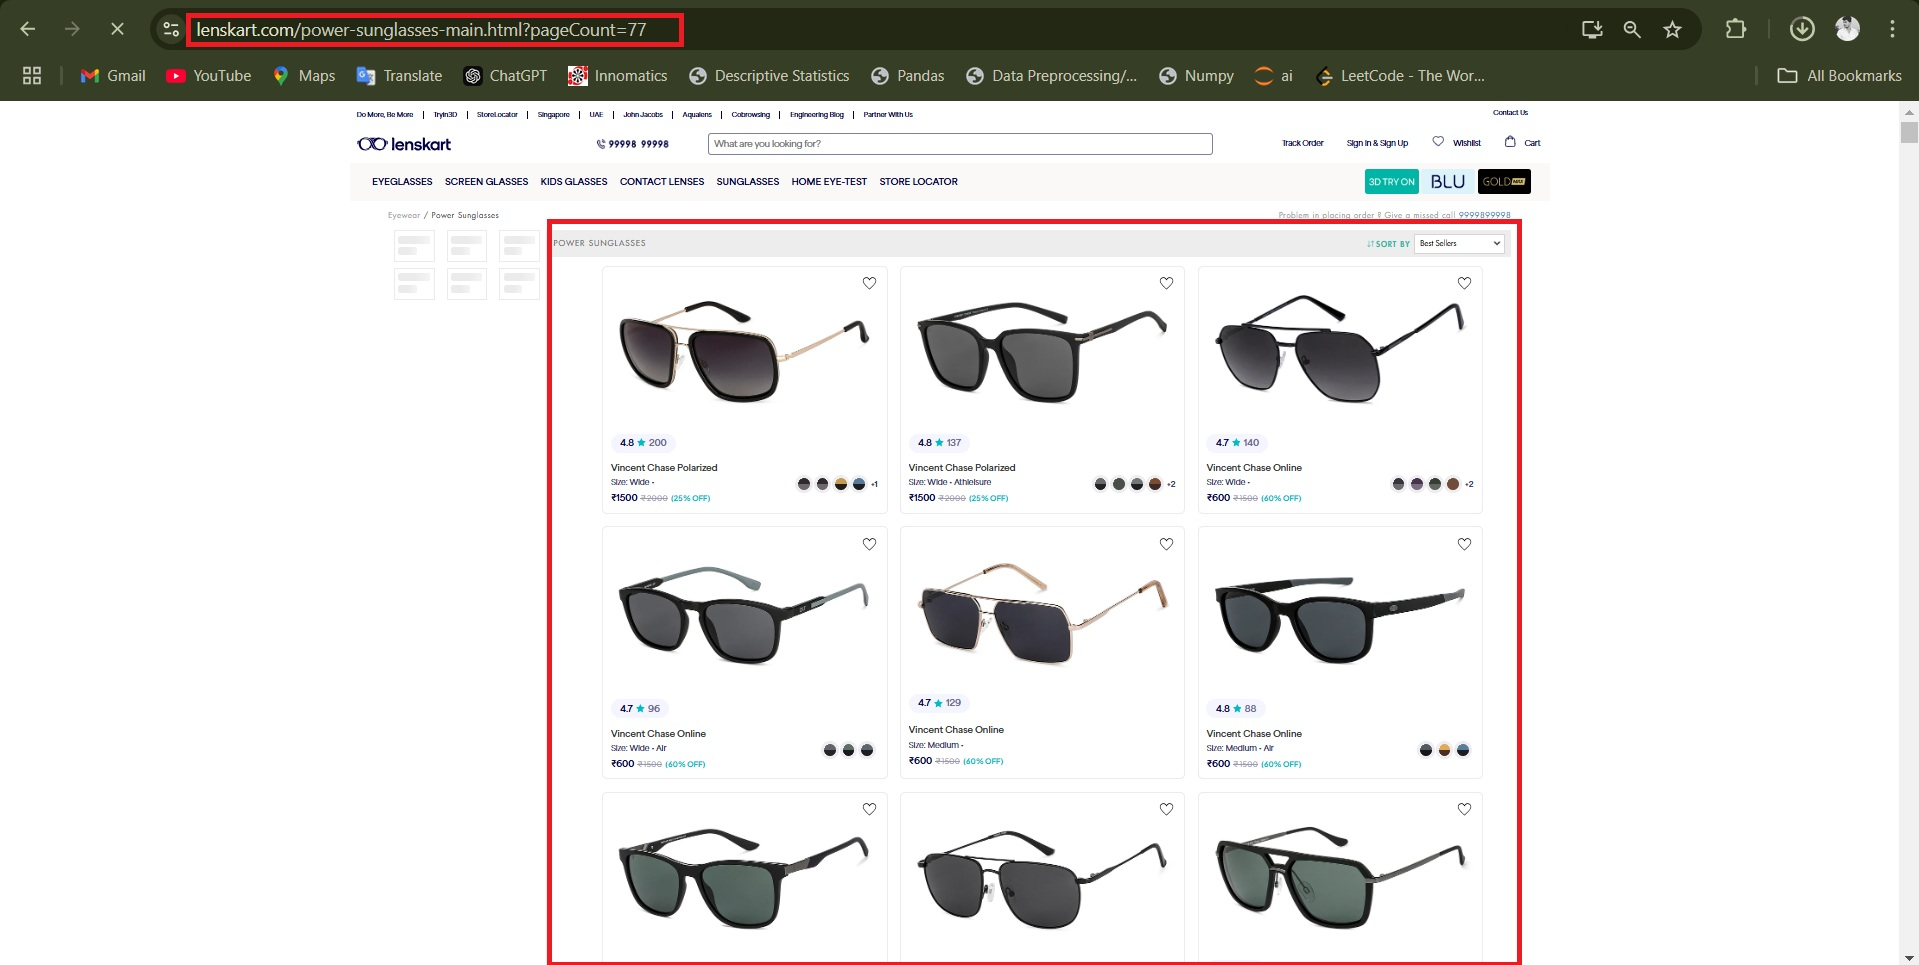

In [71]:
link = "https://www.lenskart.com/power-sunglasses-main.html?pageCount=77"

In [72]:
response = requests.get(link)
response.status_code

200

In [73]:
soup = BeautifulSoup(response.text)

In [74]:
brand = []
for i in soup.find_all("p",class_ = "ProductTitle--xakon1 jysllL"):
    brand.append(i.text)

In [75]:
len(brand)

1170

In [76]:
size = []
for i in soup.find_all("span", class_="ProductSize--1gq7vf9 ksOSAx"):
    match = re.findall(r'Size:\s*(.*?)\s*•',i.get_text())
    size.append(match[0])

In [77]:
len(size)

1170

In [78]:
OG_price = []
for i in soup.find_all("span",class_ = "Strikethrough--19jxslx bxaPOA"):
    OG_price.append(i.text)

In [79]:
len(OG_price)

1162

In [80]:
OF_price = []
for i in soup.find_all("div",class_ = "OfferPrice--169iodc kPAsSR"):
    OF_price.append(i.text)

In [81]:
len(OF_price)

1162

In [82]:
offer = []
for i in soup.find_all("h5",class_="Title--19p6sp5 dnrDXb"):
    match = re.findall('\d+%',i.get_text())
    offer.append(match[0])

In [83]:
rating = []
for i in soup.find_all("span",class_ = "NumberedRatingSpan--kts3v6 cSQYCU"):
    rating.append(i.text)

In [84]:
len(rating)

1170

In [85]:
dic2 = {"Brand":brand,"Size":size,"Rating":rating}
data = {"Original price":OG_price,"Offer price":OF_price,"Discount":offer}

In [86]:
df1 = pd.DataFrame(dic2)
df2 = pd.DataFrame(data)

In [87]:
power_SunGlasses = pd.concat([df1,df2],axis = 1)

In [88]:
power_SunGlasses.to_csv("Power Sun Glasses.csv")

In [89]:
power_SunGlasses

,Brand,Size,Rating,Original price,Offer price,Discount
0,Vincent Chase Polarized,Wide,4.8,₹ 2000,₹1500,25%
1,Vincent Chase Polarized,Wide,4.8,₹ 2000,₹1500,25%
2,Vincent Chase Online,Wide,4.7,₹ 1500,₹600,60%
3,Vincent Chase Online,Wide,4.7,₹ 1500,₹600,60%
4,Vincent Chase Online,Medium,4.8,₹ 1500,₹600,60%
...,...,...,...,...,...,...
1165,Hooper,8-12 yrs,0,NaN,NaN,NaN
1166,Hooper,5-8 yrs,4.5,NaN,NaN,NaN
1167,Hooper,8-12 yrs,0,NaN,NaN,NaN
1168,Hooper,5-8 yrs,0,NaN,NaN,NaN


## Combining All datasets:

In [175]:
Screen_Glasses

,Brand,Size,Rating,Original price,Offer price,Discount
0,Lenskart BLU Screen Glasses,Medium,4.6,₹ 1500,₹600,60%
1,Lenskart BLU Screen Glasses,Medium,4.6,₹ 1500,₹600,60%
2,Lenskart BLU Screen Glasses,Medium,4.5,₹ 1500,₹600,60%
3,Lenskart BLU Screen Glasses,Medium,4.6,₹ 1500,₹600,60%
4,Lenskart BLU Screen Glasses,Medium,4.5,₹ 1500,₹600,60%
...,...,...,...,...,...,...
358,Lenskart BLU Screen Glasses,Extra Wide,4.7,NaN,NaN,NaN
359,Lenskart BLU Screen Glasses,Extra Wide,4.6,NaN,NaN,NaN
360,Lenskart BLU Screen Glasses,Medium,4.5,NaN,NaN,NaN
361,Lenskart BLU Screen Glasses,Wide,4.6,NaN,NaN,NaN


In [177]:
SunGlasses

,Brand,Size,Rating,Original price,Offer price,Offer
0,Vincent Chase,Medium,4.8,₹ 2000,₹1500,25%
1,Vincent Chase Polarized,Medium,4.9,₹ 2000,₹1500,25%
2,Vincent Chase Polarized,Wide,4.8,₹ 2000,₹1500,25%
3,Vincent Chase Polarized,Medium,5,₹ 2000,₹1500,25%
4,Vincent Chase Polarized,Medium,4.9,₹ 2000,₹1500,25%
...,...,...,...,...,...,...
1159,OJOS,Medium,0,₹ 2000,₹1500,25%
1160,OJOS,Extra Wide,0,₹ 2000,₹1500,25%
1161,OJOS,Medium,0,₹ 2000,₹1500,25%
1162,OJOS,Extra Wide,0,₹ 2000,₹1500,25%


In [179]:
Eye_Glasses

,Brand,Size,Rating,Original price,Offer price,Discount
0,Lenskart Air,Medium,4.7,₹ 2000,₹1500,25%
1,Lenskart Air,Medium,4.8,₹ 2000,₹1500,25%
2,John Jacobs,Medium,4.8,₹ 4000,₹3500,13%
3,Lenskart STUDIO,Medium,4.9,₹ 2000,₹1500,25%
4,Vincent Chase,Wide,4.8,₹ 2000,₹1500,25%
...,...,...,...,...,...,...
1165,Vincent Chase,Narrow,5,NaN,NaN,NaN
1166,John Jacobs,Medium,4.8,NaN,NaN,NaN
1167,Vincent Chase,Wide,0,NaN,NaN,NaN
1168,OWNDAYS,Extra Wide,4.9,NaN,NaN,NaN


In [181]:
power_SunGlasses

,Brand,Size,Rating,Original price,Offer price,Discount
0,Vincent Chase Polarized,Wide,4.8,₹ 2000,₹1500,25%
1,Vincent Chase Polarized,Wide,4.8,₹ 2000,₹1500,25%
2,Vincent Chase Online,Wide,4.7,₹ 1500,₹600,60%
3,Vincent Chase Online,Wide,4.7,₹ 1500,₹600,60%
4,Vincent Chase Online,Medium,4.8,₹ 1500,₹600,60%
...,...,...,...,...,...,...
1165,Hooper,8-12 yrs,0,NaN,NaN,NaN
1166,Hooper,5-8 yrs,4.5,NaN,NaN,NaN
1167,Hooper,8-12 yrs,0,NaN,NaN,NaN
1168,Hooper,5-8 yrs,0,NaN,NaN,NaN


In [195]:
uncleaned_data = pd.concat([Eye_Glasses,power_SunGlasses,Screen_Glasses,SunGlasses],ignore_index=True)

In [199]:
uncleaned_data.drop(columns='Offer',inplace=True)

In [191]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#uncleaned_data

In [207]:
uncleaned_data.isna().sum()

Brand                0
Size                 0
Rating               0
Original price      47
Offer price         47
Discount          1211
dtype: int64

In [209]:
uncleaned_data

,Brand,Size,Rating,Original price,Offer price,Discount
0,Lenskart Air,Medium,4.7,₹ 2000,₹1500,25%
1,Lenskart Air,Medium,4.8,₹ 2000,₹1500,25%
2,John Jacobs,Medium,4.8,₹ 4000,₹3500,13%
3,Lenskart STUDIO,Medium,4.9,₹ 2000,₹1500,25%
4,Vincent Chase,Wide,4.8,₹ 2000,₹1500,25%
5,John Jacobs,Narrow,4.7,₹ 4000,₹3500,13%
6,Lenskart Air,Wide,4.8,₹ 2000,₹1500,25%
7,Lenskart Air,Medium,4.8,₹ 2000,₹1500,25%
8,John Jacobs,Wide,4.8,₹ 4000,₹3500,13%
9,Vincent Chase,Narrow,4.8,₹ 2000,₹1500,25%
